<a href="https://colab.research.google.com/github/FireHead90544/gogoanime-dl/blob/main/gogoanime_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><b>GogoAnime Downloader</b></center>
### <center><i>A python script to download all the episodes of an anime from gogoanime, also archives them and moves to google drive for easy one-click download.</i></center>
<p align='right'><i>~ Author:</i> <b><i>Rudransh Joshi</i></b></p>

# Installing Requirements
*   gogoanimeapi


In [ ]:
pip install git+https://github.com/BaraniARR/gogoanimeapi.git

# The Downloader
<i>Just execute the cell, and provide the inputs as asked. Please try to use servers which provides links ending with <b>.mp4</b>, like (HDP-mp4, 360P-mp4, 480P-mp4, 720P-mp4, 1080P-mp4, StreamTape, and others ending with .mp4), try every server, who knows whichever will work for you.</i>

In [ ]:
from IPython.display import clear_output
from gogoanimeapi import gogoanime as anime
import os
import threading
import urllib.request

# Function to show the list of all animes that matches the given name and give user the choice to select the anime they are looking for and get it's id
def select_anime(anime_name):
  results = anime.get_search_results(query=anime_name)
  try:
    for result in enumerate(results):
      anime_details = anime.get_anime_details(animeid=result[1]['animeid'])
      print(f"\n[{result[0]+1}] Anime Name: {anime_details['title']}\nAnime ID: {result[1]['animeid']}\nYear: {anime_details['year']}\nType: {anime_details['type']}\nStatus: {anime_details['status']}\nGenre: {eval(anime_details['genre'])}\nEpisodes: {anime_details['episodes']}\nOther Names: {anime_details['other_names']}\nPlot Summary: {anime_details['plot_summary']}\n")
  except Exception:
    clear_output()
    print(f'ANIME NAME: {anime_name}')
    print(f"No anime found with that name, try entering the name properly.")
    return
  
  sno = int(input("\n\nSELECT ANIME: ")) - 1
  print("\n")
  if sno < 0 or sno > (len(results) - 1):
    print(f"That serial no. is not valid, try again with proper serial no.")
    return
  return results[sno]["animeid"]
  

name = input("ANIME NAME: ").lower()
anime_id = select_anime(name)

def get_episode_download_urls(anime_id):
  if not anime_id:
    return
  animee = anime.get_anime_details(animeid=anime_id)
  ep_count = int(animee['episodes'])
  servers = anime.get_episodes_link(animeid=anime_id, episode_num=1)
  for server in enumerate(list(servers.keys())[1:]):
    print(f"[{server[0]+1}] {server[1]}")

  
  server = int(input("\n\nSELECT SERVER: ")) - 1
  if server < 0 or server > (len(list(servers.keys())[1:]) - 1):
    print(f"That serial no. is not valid, try again with proper serial no.")
    return
  server_name = list(servers.keys())[1:][server]
  ep_dl_links = []
  for episode in range(1, ep_count+1):
    servers = anime.get_episodes_link(animeid=anime_id, episode_num=episode)
    ep_dl_links.append(servers.get(server_name))
  
  return ep_dl_links

ep_dl_links = get_episode_download_urls(anime_id)
def start_download(ep_dl_links):
  if not ep_dl_links:
    return
  try:
    os.mkdir(os.path.join(os.path.abspath("."), anime_id))
  except Exception:
    pass
  for link in enumerate(ep_dl_links):
    try:
      urllib.request.urlretrieve(link[1], f'{os.path.join(os.path.abspath("."), anime_id)}/[{link[0]+1}] {anime_id}.mp4')
      print(f"Downloaded Episode #[{link[0]+1}] {anime_id}.mp4")
    except Exception as e:
      print(f"An Error occured while downloading episode #[{link[0]+1}] {anime_id}.mp4:\t{e}\nTrying to download from another server.")
      link = anime.get_episodes_link(anime_id, link[0]+1)
      for i in list(link.values()):
        if i.endswith(".mp4"):
          try:
            urllib.request.urlretrieve(i, f'{os.path.join(os.path.abspath("."), anime_id)}/[{link[0]+1}] {anime_id}.mp4')
            print(f"Downloaded Episode #[{link[0]+1}] {anime_id}.mp4")
            break
          except Exception:
            continue
        else:
          print(f"Unable to Downloaded Episode #[{link[0]+1}] {anime_id}.mp4")
  print(f"Downloaded Anime: {anime_id} in {os.path.join(os.path.abspath('.'), anime_id)}")

download_thread = threading.Thread(target=start_download, args=[ep_dl_links])
download_thread.start()
download_thread.join()

# Zipping & Sending to Google Drive
<i>Read the info before each cell, and execute the cell following that according to the info provided. After zipping you can go to the files tab of this google colab and right click and download .zip file (which you can extract in your device after downloading) of the downloaded anime directly without sending to google drive, if you want to. Else, just connect your google drive and send it there, and you can download it later from your google drive.</i>

1. **Zipping the file**<br>
Syntax is written in the comment, to get the name of folder you can visit the **files** tab, to get the path to folder right click on the folder and click **copy path**.

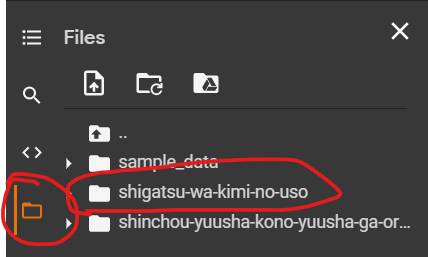

In [ ]:
!zip -r one-punch-man-s1.zip /content/one-punch-man  #zip -r <file_to_be_created.zip> /path/to/folder

2. **Connect your google drive**<br>
Execute the cell, open the link in new tab, copy the code and paste the code in the input.

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

3. **Moving to google drive**<br>
Syntax is written in comments, just change the file and folder path.

In [ ]:
!mv /content/one-punch-man-s1.zip /gdrive/"My Drive"  # !mv /path/to/file.zip /path/to/google/drive

# <b>Done</b>
Alright, everything's done. If you need any help, create an issue on the github repository of this notebook.